# ANN model for loan classification
Created by Taishi Nammoto.
*****

### The Data 
I will use the data obtained from Kaggle.<br>
https://www.kaggle.com/wordsforthewise/lending-club

### Abstract 
In this project, I will guide you how I built an ANN model, trained to predict whether new potential customers will pay back their loan. 

*****

## Step 3: Split the dataset into training data and testing data
continue from previous section: preprocessing 

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [2]:
path = 'Data/'
file_name = 'clean_data.csv'
df = pd.read_csv(path+file_name)

In [3]:
X = df.drop('loan_mapped',axis=1).values
y = df['loan_mapped'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=5)

## Step 4: Normalization 

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Step5: Build ANN model

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [8]:
tf.__version__

'2.4.0'

In [9]:
X_train.shape

(807186, 65)

In [10]:
model = Sequential()

model.add(Dense(65,  activation='relu', input_shape=X_train.shape))
model.add(Dropout(0.2)) # prevent overfitting

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 807186, 65)        4290      
_________________________________________________________________
dropout (Dropout)            (None, 807186, 65)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 807186, 30)        1980      
_________________________________________________________________
dropout_1 (Dropout)          (None, 807186, 30)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 807186, 15)        465       
_________________________________________________________________
dropout_2 (Dropout)          (None, 807186, 15)        0         
_________________________________________________________________
dense_3 (Dense)              (None, 807186, 1)         1

## Step6: Train the model

In [12]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

board = TensorBoard(log_dir='logs\fit',
                    histogram_freq=1,
                    write_graph=True,
                    write_images=True,
                    update_freq='epoch',
                    profile_batch=2,
                    embeddings_freq=1)

# import tensorflow_addons as tfa
# tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [13]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[early_stop,board]
          )

Epoch 1/600
25225/25225 [==============================] - 38s 1ms/step - loss: 0.1298 - val_loss: 0.0588
Epoch 2/600
25225/25225 [==============================] - 36s 1ms/step - loss: 0.0674 - val_loss: 0.0509
Epoch 3/600
25225/25225 [==============================] - 34s 1ms/step - loss: 0.0566 - val_loss: 0.0422
Epoch 4/600
25225/25225 [==============================] - 32s 1ms/step - loss: 0.0508 - val_loss: 0.0376
Epoch 5/600
25225/25225 [==============================] - 33s 1ms/step - loss: 0.0449 - val_loss: 0.0327
Epoch 6/600
25225/25225 [==============================] - 32s 1ms/step - loss: 0.0413 - val_loss: 0.0395
Epoch 7/600
25225/25225 [==============================] - 32s 1ms/step - loss: 0.0394 - val_loss: 0.0310
Epoch 8/600
25225/25225 [==============================] - 30s 1ms/step - loss: 0.0374 - val_loss: 0.0274
Epoch 9/600
25225/25225 [==============================] - 32s 1ms/step - loss: 0.0367 - val_loss: 0.0277
Epoch 10/600
25225/25225 [====================

Text(0, 0.5, 'losses')

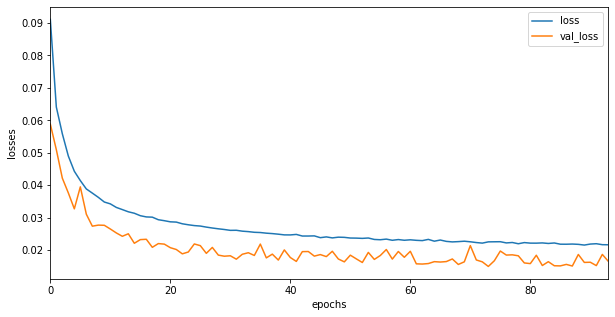

In [14]:
result = pd.DataFrame(model.history.history)
ax = result.plot(figsize=(10,5))
ax.set_xlabel("epochs")
ax.set_ylabel("losses")

## Step7: Evaluate the model

In [15]:
predictions = model.predict_classes(X_test)

/opt/anaconda3/envs/mytfenv/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     53759
           1       0.99      1.00      1.00    215303

    accuracy                           1.00    269062
   macro avg       1.00      0.99      0.99    269062
weighted avg       1.00      1.00      1.00    269062



## Step8: Save the model and scaler

In [18]:
model.save(path+'loan_model.h5')

In [19]:
import joblib
joblib.dump(scaler,path+'loan_scaler.pkl')

['/Users/taishinammoto/Documents/tf_project/ANN_projects/loan_classification/Data/loan_scaler.pkl']

## Step 9: Load the model and scaler

In [20]:
from tensorflow.keras.models import load_model

In [21]:
model = load_model(path+'loan_model.h5')
scaler = joblib.load(path+'loan_scaler.pkl')

## Step10: Test the model

In [22]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

X = df.drop('loan_mapped',axis=1)
y = df['loan_mapped']

person = X.iloc[random_ind]
person

Unnamed: 0         1.981858e+06
term               3.600000e+01
int_rate           9.490000e+00
total_pymnt        1.347789e+04
total_pymnt_inv    1.347789e+04
                       ...     
small_business     0.000000e+00
vacation           0.000000e+00
wedding            0.000000e+00
w                  1.000000e+00
Joint App          0.000000e+00
Name: 1218764, Length: 65, dtype: float64

In [23]:
# Will this person pay back the loan?
# Yes: 1
# No: 0

prediction = model.predict_classes(person.values.reshape(1,65))

# The true answer
true_answer = y.iloc[random_ind]

print('prediction:', prediction, 'true answer:', true_answer)

prediction: [[1]] true answer: 1
